In [3]:
%matplotlib inline
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.contrib.tensorboard.plugins import projector

In [5]:
elmo = hub.Module("https://tfhub.dev/google/elmo/2", trainable=True)

In [83]:
def tsne_plot(sent_string):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []
    
    import tensorflow as tf
    import sys
    np.set_printoptions(threshold=sys.maxsize)
    embeddings = elmo(sent_string,
                 signature="default",
                 as_dict=True)["elmo"]



    init = tf.initialize_all_variables()
    sess = tf.Session()
    sess.run(init)
    
    
    for i in range(len(sent_string)):
        for j in range(len(sent_string[i].split())):
            tokens.append(sess.run(embeddings[i][j]))
            labels.append(sent_string[i].split()[j])
            
    
   
    
    tsne_model = TSNE(perplexity=6, n_components=2, init='random', n_iter=500)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(18, 12)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [81]:
sent_string = ["Argentina played football very well","Brazil is a strong team", 
                   "Artists all over the world are attending the play", 
                   "Child is playing the guitar", 
                   "There was absolute silence during the play"]


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


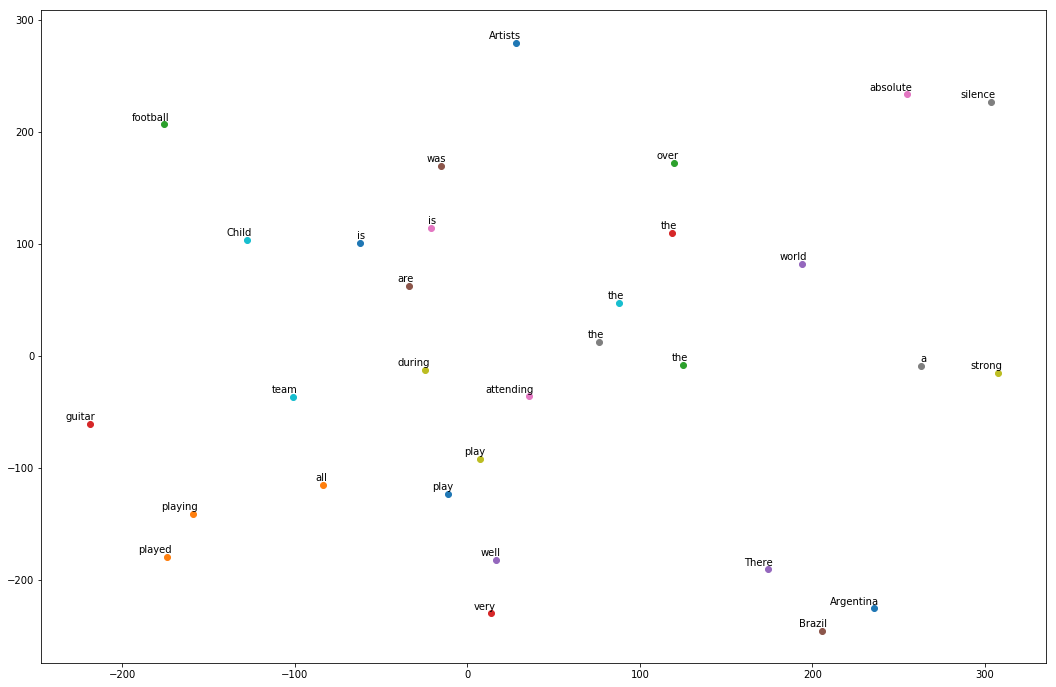

In [85]:
tsne_plot(sent_string)

In [77]:
def tsne_plot_word2vec(embeddings):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []
    
    import tensorflow as tf
    import sys
    np.set_printoptions(threshold=sys.maxsize)



    init = tf.initialize_all_variables()
    sess = tf.Session()
    sess.run(init)
    
 ## change this for loop- tokens are embeddings, labels are words   
    for i in range(len(sent_string)):
        for j in range(len(sent_string[i].split())):
            tokens.append(sess.run(embeddings[i][j]))
            labels.append(sent_string[i].split()[j])
            
    
   
    
    tsne_model = TSNE(perplexity=6, n_components=2, init='random', n_iter=500)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(18, 12)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()